# EDA

Предварительный анализ данных до обработок - информация о датасете, вывод графиков, гистограмм, матриц корреляции

Анализировать будем как по всему датасету, так и по отдельным серийным номерам (то есть по отдельным дискам)

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

from helper.eda import * 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Overall information

- smart 5 - Число операций переназначения секторов. Когда диск обнаруживает ошибку чтения/записи
- smart 9 - Power-on Time Count
- smart 187 - Количество ошибок, которое накопитель сообщил хосту (интерфейсу компьютера) при любых операциях
- smart 188 - Количество прерванных операций в связи с таймаутом HDD
- smart 192 - Число циклов выключений или аварийных отказов
- smart 197 - Число секторов, являющихся кандидатами на замену.
- smart 198 - Число некорректируемых (средствами диска) секторов. (критические дефекты)
- smart 199 - число ошибок, возникающих при передаче данных по интерфейсу
- smart 240 - Общее время нахождения блока головок в рабочем положении в часах.
- smart 241 - полное число записанных секторов.
- smart 242 - полное число прочитанных секторов.

In [2]:
hdd_dataset = HDDDataset.read_csv('ST14000NM001G.csv')

In [3]:
eda = EDA(hdd_dataset)
eda.show_info()

=== Общая информация ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320142 entries, 0 to 7320141
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   serial_number   object 
 2   model           object 
 3   capacity_bytes  int64  
 4   failure         int64  
 5   smart_5_raw     float64
 6   smart_9_raw     float64
 7   smart_187_raw   float64
 8   smart_188_raw   float64
 9   smart_192_raw   float64
 10  smart_197_raw   float64
 11  smart_198_raw   float64
 12  smart_199_raw   float64
 13  smart_240_raw   float64
 14  smart_241_raw   float64
 15  smart_242_raw   float64
dtypes: float64(11), int64(2), object(3)
memory usage: 893.6+ MB
None

=== Первые строки информации ===
         date serial_number          model  capacity_bytes  failure  \
0  2020-11-14      ZL201VZX  ST14000NM001G  14000519643136        0   
1  2020-11-15      ZL201VZX  ST14000NM001G  14000519643136        0   
2  2020-11-16      ZL20

### Количество дисков

In [4]:
print(len(eda.get_serial_numbers()))

10927


## Visualisation

### Ассиметрия

In [5]:
eda.show_assymetry()

=== Ассиметрия для SMART признаков всего датасета ===
smart_5_raw: 80.66866573787316 - 7716.739383529317
smart_9_raw: 0.2540576957549096 - -0.9312928402698217
smart_187_raw: 147.97888336215297 - 31517.604861278433
smart_188_raw: 8.613512415385351 - 93.40399599309184
smart_192_raw: 106.91938286364328 - 11583.862314389331
smart_197_raw: 421.1138338179828 - 226907.19655870734
smart_198_raw: 421.1138338179828 - 226907.19655870734
smart_199_raw: 36.426164267677706 - 1617.7455350639893
smart_240_raw: 0.2579738471509671 - -0.9280111773455597
smart_241_raw: -0.5689914277554522 - -0.3211474271502395
smart_242_raw: 1.1238459759576893 - 1.208767418863541


### Гистограммы

=== Гистограммы признаков для выбранного диска: ZL201VZX ===


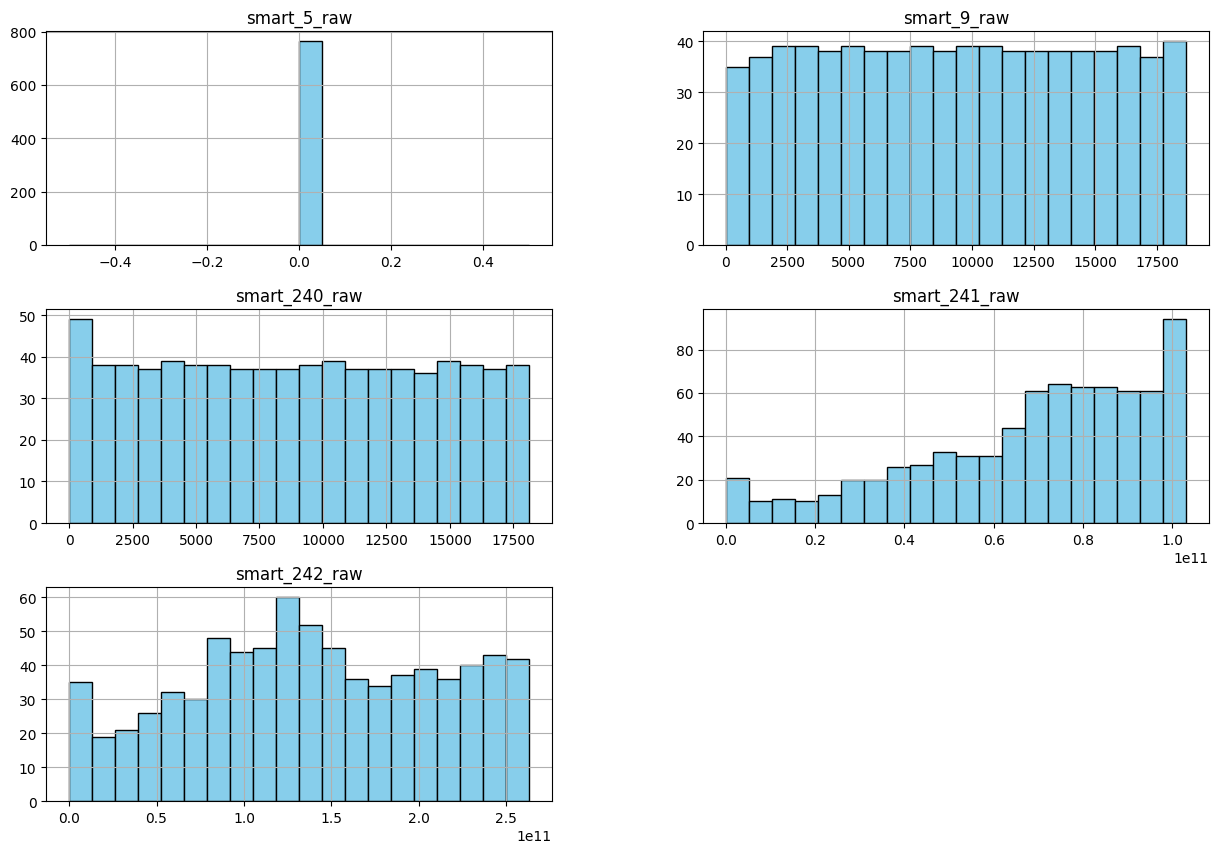

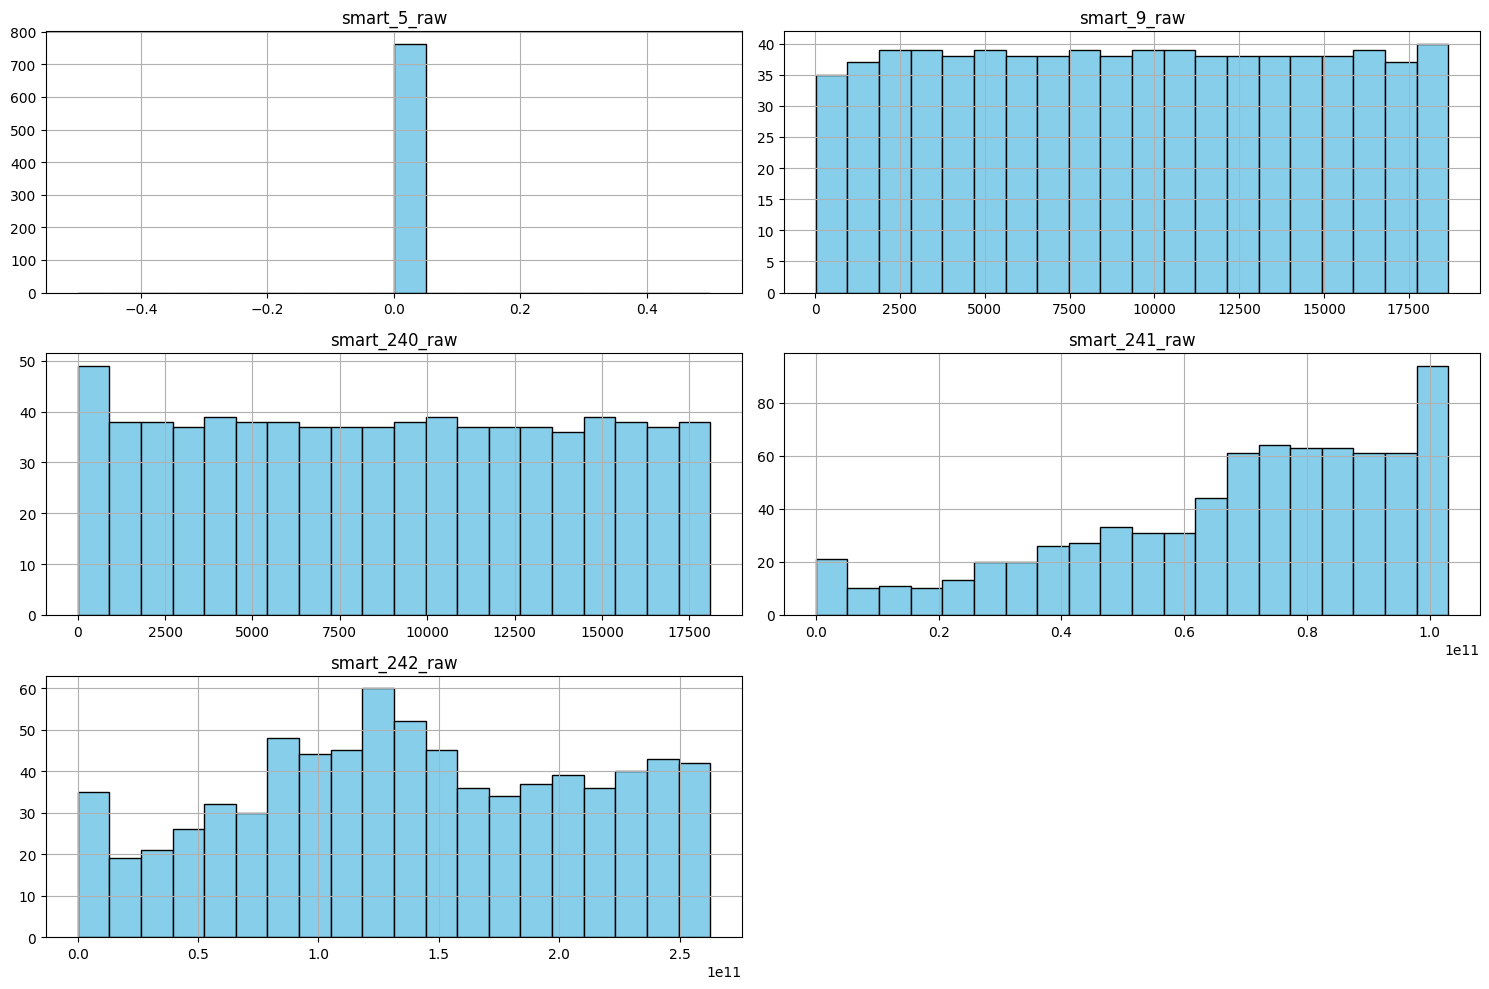

In [6]:
eda.select_disk(eda.get_serial_numbers()[0])
eda.plot_histograms(['smart_5_raw', 'smart_9_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'])
eda.unselect_disk()

### Матрица корреляции

=== Корреляционная матрица для всего датасета ===


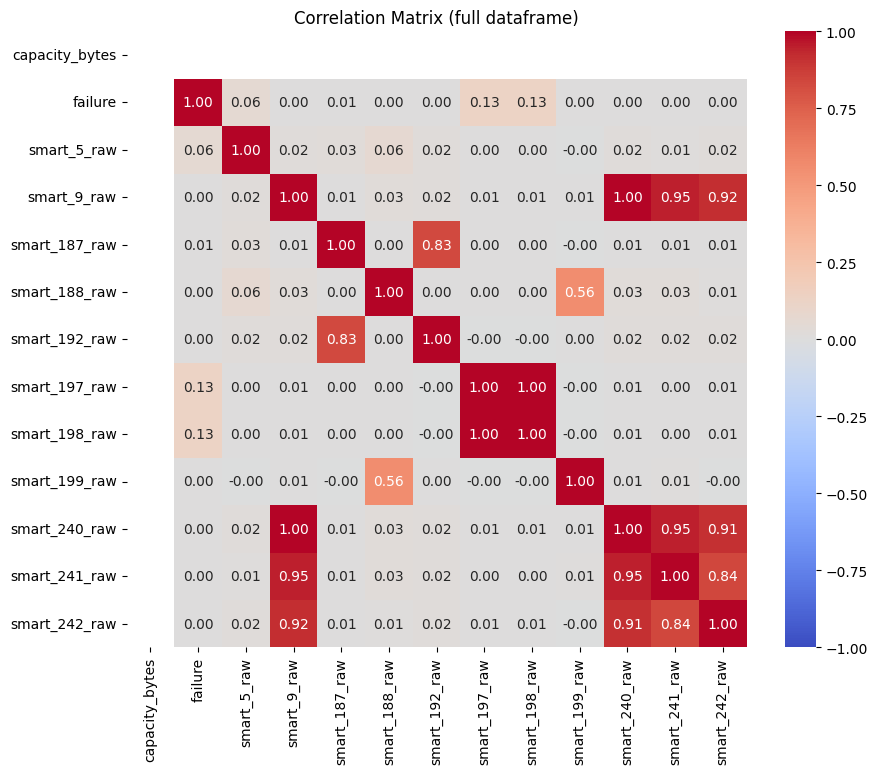

In [7]:
eda.plot_correlation_matrix()

=== Корреляционная матрица для выбранного диска: ZL201VZX ===


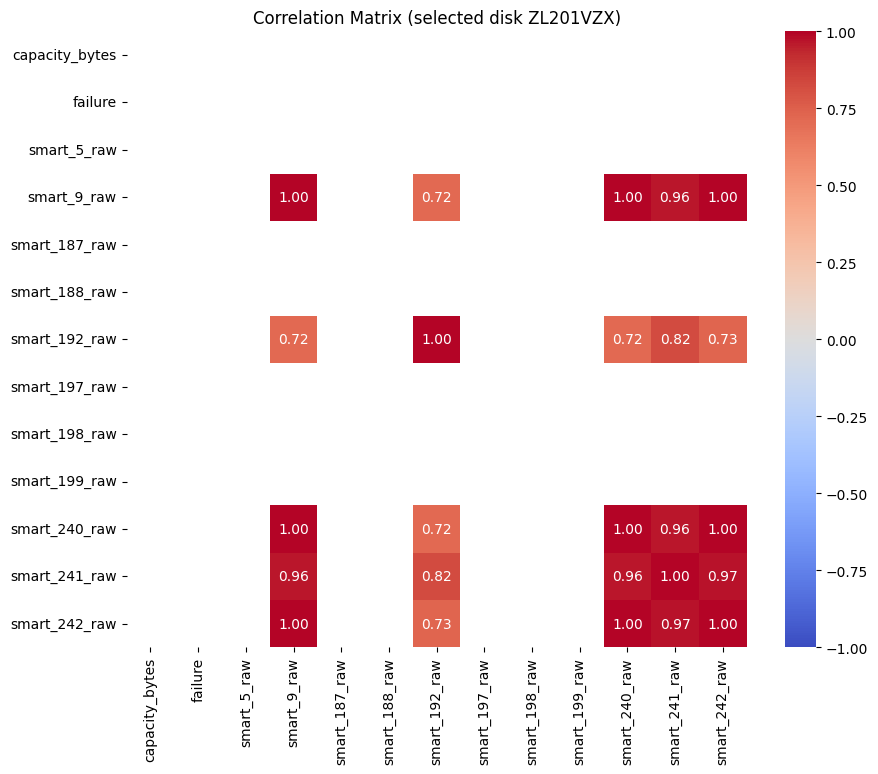

In [8]:
eda.select_disk(eda.get_serial_numbers()[0])
eda.plot_correlation_matrix()
eda.unselect_disk()

### Временные ряды

=== Выбран диск: ZL201VZX ===
=== Временные ряды для выбранного диска ===


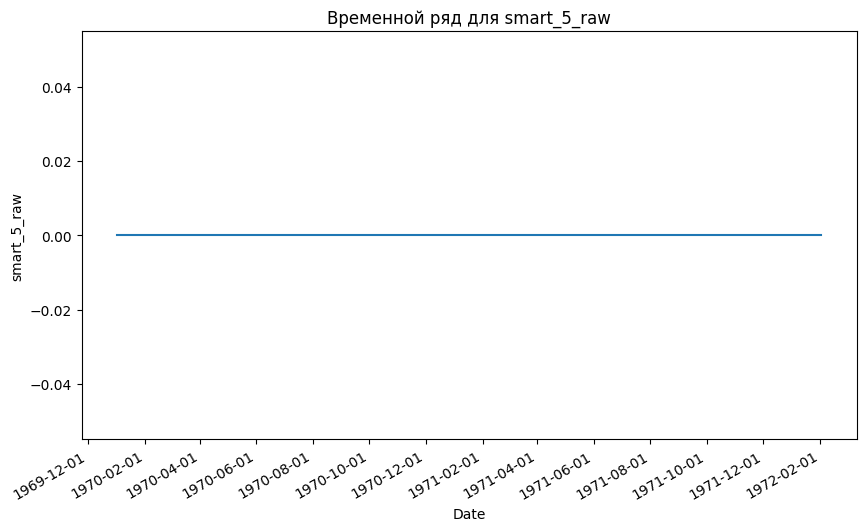

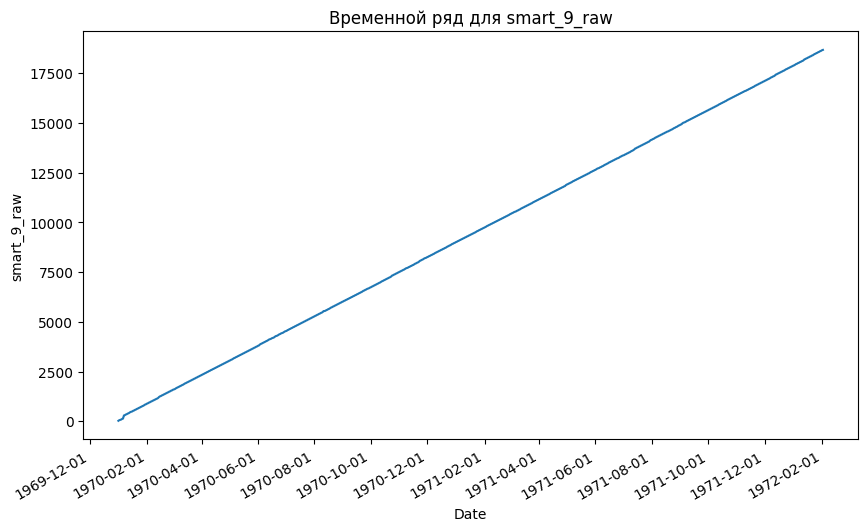

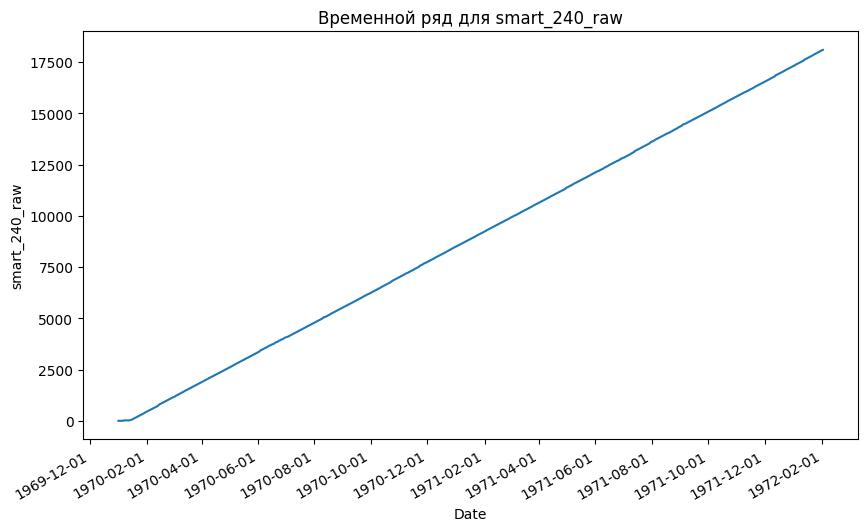

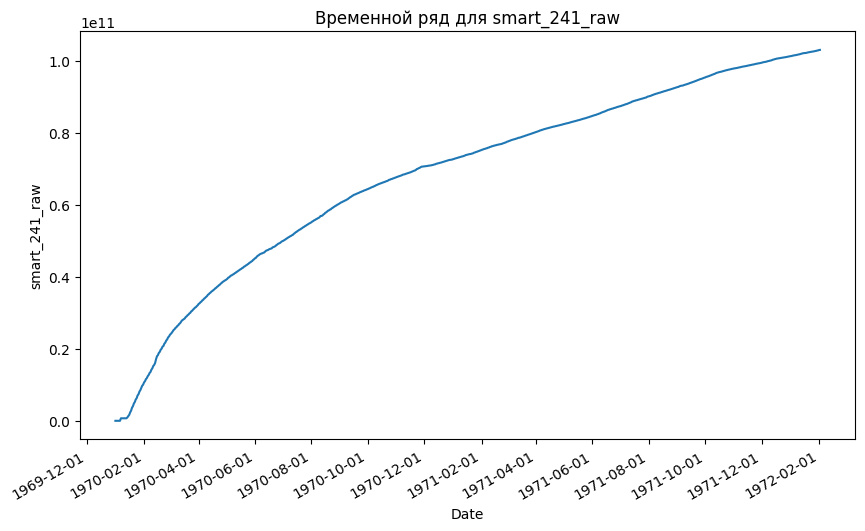

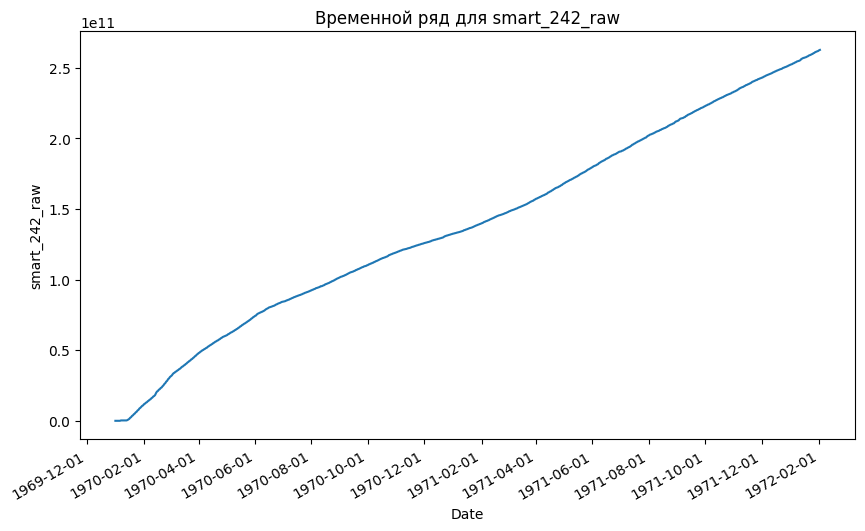

In [10]:
eda.select_disk(eda.get_serial_numbers()[0])
eda.plot_time_series(features=['smart_5_raw', 'smart_9_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'], multiplot=False)
eda.unselect_disk()

### Boxplots

=== Выбран диск: ZL201VZX ===
=== Boxplots для числовых признаков для выбранного диска ===


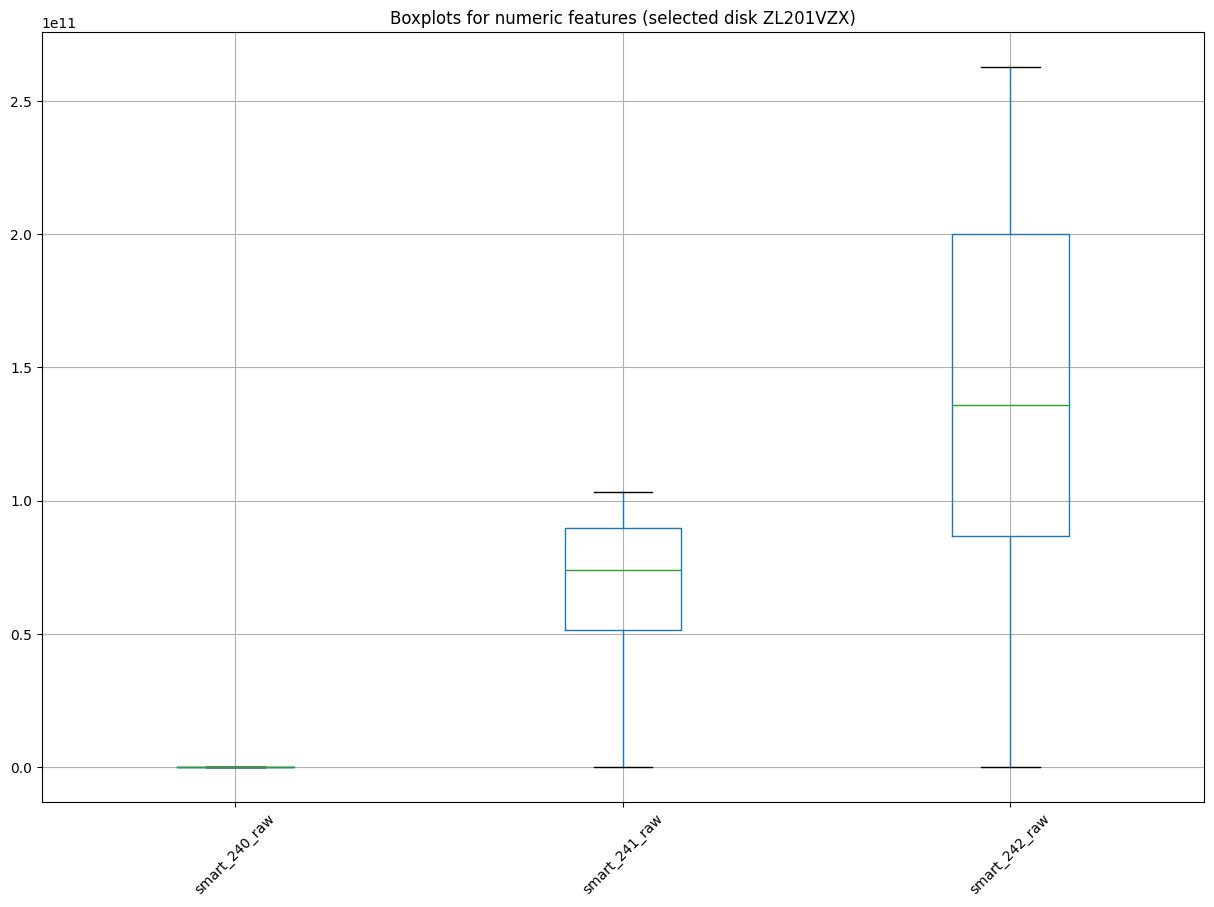

In [14]:
eda.select_disk(eda.get_serial_numbers()[0])
eda.plot_boxplots(features=['smart_240_raw', 'smart_241_raw', 'smart_242_raw'])
eda.unselect_disk()